# Essential Libraries

Let's import the essential libraries.

In [2]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set()                                 # this is to set the default Seaborn style for graphics

## A Quick Look At Our Dataset

We import the dataset that is in csv format with _read_csv_ from the pandas library.

#### Putting into dataframe

In [3]:
df = pd.read_csv('laptops.csv')
df.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,83,iball,iBall Excelance CompBook Laptop (AQC/ 2GB/ 32G...,9800,41,intel,other,4,0,2,...,No secondary storage,0,intel,integrated,False,11.6,1366,768,windows,1
1,94,ultimus,Ultimus Pro NU14U3INC43BN-CS Laptop (Celeron N...,11990,41,intel,celeron,2,2,4,...,No secondary storage,0,intel,integrated,False,14.1,1366,768,windows,1
2,384,primebook,Primebook PBMTWIFI11064 Wi-Fi Laptop (MediaTek...,12990,31,other,other,8,0,4,...,No secondary storage,0,arm,integrated,False,11.6,1366,768,other,1
3,203,jio,Jio JioBook NB1112MM BLU 2023 Netbook Laptop (...,14701,24,other,other,8,0,4,...,No secondary storage,0,arm,integrated,False,11.6,1366,768,other,1
4,76,primebook,Primebook 4G Android Laptop (MediaTek Kompanio...,14990,26,other,other,8,0,4,...,No secondary storage,0,arm,integrated,False,11.6,1366,768,android,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [5]:
df.shape

(991, 22)

In [6]:
df.nunique()

index                         991
brand                          26
Model                         991
Price                         545
Rating                         54
processor_brand                 4
processor_tier                 15
num_cores                      12
num_threads                    15
ram_memory                      7
primary_storage_type            2
primary_storage_capacity        7
secondary_storage_type          2
secondary_storage_capacity      4
gpu_brand                       5
gpu_type                        3
is_touch_screen                 2
display_size                   20
resolution_width               20
resolution_height              22
OS                              7
year_of_warranty                4
dtype: int64

# Data Cleaning

## 1. Variable Selection and Preparation

We opted to analyze **three key factors:** **processor brand, brand, and RAM memory**, due to their significant influence on the pricing and performance of electronic devices. 

**Processor brand** plays a pivotal role in determining the computing power and efficiency of devices, with leading brands such as Intel and AMD often commanding different market segments. 

**Brand** reputation and consumer preferences also heavily influence purchasing decisions, making it essential to examine how different brands are perceived within the market. 

Additionally, **RAM memory** directly impacts the speed and multitasking capabilities of devices, thus affecting their overall performance and pricing.

By looking closely at these aspects, we hope to uncover deeper insights into how prices are affected by these factors.

In [7]:
threeVars = df[['processor_brand', 'ram_memory', 'brand', 'Price']]
threeVars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processor_brand  991 non-null    object
 1   ram_memory       991 non-null    int64 
 2   brand            991 non-null    object
 3   Price            991 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.1+ KB


In [8]:
threeVars.head()

,processor_brand,ram_memory,brand,Price
0,intel,2,iball,9800
1,intel,4,ultimus,11990
2,other,4,primebook,12990
3,other,4,jio,14701
4,other,4,primebook,14990


### Identification and removal of anomalies in label of our variables

#### a) Processor_Brand

Let's find out the number of different labels and their counts for _processor_brand_.

In [9]:
# Find the number of unique values for 'processor_brand'
unique_processor_brand_count = threeVars['processor_brand'].nunique()
print("\nNumber of unique values for 'processor_brand' column:", unique_processor_brand_count)

print('--------------------------------------------------------------')

# Print out the unique values and their counts for 'processor_brand'
processor_brand_counts = df['processor_brand'].value_counts()
print("Unique processor brands and their counts:")
print(processor_brand_counts)


Number of unique values for 'processor_brand' column: 4
--------------------------------------------------------------
Unique processor brands and their counts:
processor_brand
intel    705
amd      267
apple     15
other      4
Name: count, dtype: int64


In [10]:
# Remove entries with 'other' in the processor brand
threeVars = threeVars[~threeVars['processor_brand'].str.contains('other')]

In [217]:
# Print out the unique values and their counts for 'processor_brand' after removal of 'others'
processor_brand_counts = threeVars['processor_brand'].value_counts()
print("Unique processor brands and their counts:")
print(processor_brand_counts)

Unique processor brands and their counts:
intel    705
amd      267
apple     15
Name: processor_brand, dtype: int64



We're removing entries where 'other' appears in the 'processor_brand' column because these represent unpopular or unspecified processor brands, which could introduce bias or inaccuracies into our analysis. Removing them ensures our analysis focuses on more reliable and complete data, improving the quality of our results.






------

#### b) Brand

Let's find out the number of different labels and their counts for _brand_ based on the current dataset that we have.

In [11]:
# Find the number of unique values for 'brand'
unique_brand_count = threeVars['brand'].nunique()
print("\nNumber of unique values for 'brand' column:", unique_brand_count)

print('--------------------------------------------------------------')

# Print out the unique values and their counts for 'brand'
brand_counts = threeVars['brand'].value_counts()
print("Unique brands and their counts:")
print(brand_counts)


Number of unique values for 'brand' column: 24
--------------------------------------------------------------
Unique brands and their counts:
brand
asus         210
hp           204
lenovo       201
dell         106
msi           90
acer          89
apple         15
infinix       13
lg             7
samsung        7
zebronics      7
ultimus        6
fujitsu        5
avita          5
wings          4
chuwi          4
gigabyte       2
microsoft      2
honor          2
realme         2
tecno          2
axl            2
walker         1
iball          1
Name: count, dtype: int64


We have chosen to remove brands with 6 or fewer counts from the dataset to ensure that our analysis is based on brands with a more substantial presence in the data. This filtering process helps maintain the dataset's integrity by focusing on brands that are more representative of the market landscape. We can also mitigate the potential skewing effects they may have on our analysis by doing this

In total we have 987 laptop model datas as we can see below.

In [12]:
threeVars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 990
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processor_brand  987 non-null    object
 1   ram_memory       987 non-null    int64 
 2   brand            987 non-null    object
 3   Price            987 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 38.6+ KB


In [13]:
# Filter out brands with 6 or fewer counts
filtered = brand_counts[brand_counts > 6].index

# Remove the filtered brands from the DataFrame
filtered_brand = df[df['brand'].isin(filtered)]

# Calculate the number of items removed
removed_items = len(df) - len(filtered_brand)

# Calculate the percentage of items removed
percentage_removed = (removed_items / len(df)) * 100

print("Number of items removed:", removed_items)
print("Percentage of items removed compared to the total dataset:", percentage_removed, "%")

Number of items removed: 41
Percentage of items removed compared to the total dataset: 4.137235116044399 %


In [14]:
# Update threeVars with the filtered DataFrame
threeVars = filtered_brand[['processor_brand', 'ram_memory', 'brand', 'Price']]
threeVars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 6 to 990
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processor_brand  950 non-null    object
 1   ram_memory       950 non-null    int64 
 2   brand            950 non-null    object
 3   Price            950 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 37.1+ KB


The percentage of total dataset we removed is 4.13% which is still quite manageable, as it ensures we focus on the most relevant and prevalent brands in our analysis. By removing these less represented brands, we can potentially improve the accuracy and reliability of our insights, as we're now working with a dataset that better represents the market's dominant players. 

----

#### c) Ram_Memory

Let's find out the number of different labels and their counts for _ram_memory_ based on the current dataset that we have.

In [15]:
# Display the information of the updated threeVars DataFrame
threeVars.info()

# Find the number of unique values for 'ram_memory' in threeVars
unique_ram_count_threeVars = threeVars['ram_memory'].nunique()
print("\nNumber of unique values for 'ram_memory' column in threeVars:", unique_ram_count_threeVars)

print('--------------------------------------------------------------')

# Print out the unique values and their counts for 'ram_memory' in threeVars
ram_memory_counts_threeVars = threeVars['ram_memory'].value_counts()
print("Unique memory (RAM) configurations and their counts in threeVars:")
print(ram_memory_counts_threeVars)


<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 6 to 990
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processor_brand  950 non-null    object
 1   ram_memory       950 non-null    int64 
 2   brand            950 non-null    object
 3   Price            950 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 37.1+ KB

Number of unique values for 'ram_memory' column in threeVars: 6
--------------------------------------------------------------
Unique memory (RAM) configurations and their counts in threeVars:
ram_memory
16    510
8     383
32     36
4      17
12      2
36      2
Name: count, dtype: int64


In [16]:
# Find entries with 12 GB RAM
ram_12_gb = threeVars[threeVars['ram_memory'] == 12]

# Find entries with 36 GB RAM
ram_36_gb = threeVars[threeVars['ram_memory'] == 36]

print("Entries with 12 GB RAM:")
print(ram_12_gb)

print("\nEntries with 36 GB RAM:")
print(ram_36_gb)

Entries with 12 GB RAM:
    processor_brand  ram_memory brand  Price
300           intel          12  acer  46990
482           intel          12    hp  60990

Entries with 36 GB RAM:
    processor_brand  ram_memory  brand   Price
976           apple          36  apple  289900
983           apple          36  apple  349900


Removing unique RAM configurations with low counts can distort the dataset's representation and adversely affect modeling, so we chose not to remove them. Each RAM configuration contributes valuable diversity to the dataset, and removing low-count entries can skew the distribution, impacting the model's ability to generalize accurately

---------

#### Total entries removed

In [17]:
# Find the number of unique values for 'processor_brand' where the brand is 'other'
other_processor_brands = df[df['processor_brand'] == 'other']['processor_brand']
print("\nNumber of unique values for 'processor_brand' column where the brand is 'other':", len(other_processor_brands))

# the number of items removed for brand
removed_items_brand = removed_items

#Total number of items removed
removed = removed_items_brand + len(other_processor_brands)

# Calculate the percentage of items removed for processor brand
percentage_removed_processor_brand = (removed / len(df)) * 100



print("\nNumber of items removed from dataset:", removed)
print("Percentage of items removed for processor brand compared to the total dataset:", percentage_removed_processor_brand, "%")


Number of unique values for 'processor_brand' column where the brand is 'other': 4

Number of items removed from dataset: 45
Percentage of items removed for processor brand compared to the total dataset: 4.540867810292633 %



We have removed 4.54% of entries from our initial dataset through the data preparation steps, which constitutes a relatively small proportion. The removal of these entries is still acceptable as it streamlines our dataset without significantly compromising its integrity or representativeness.

## 2. Check for Duplicates and NULLs

In [18]:
df.duplicated().sum()

0

There are no duplicated information in our dataset which is good as duplicated data may affect our modeling later on.

In [19]:
df.isna().sum()

index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64

There is no missing information in our three variables as well as in our dataset, so we do not have to do any removing for this time.

## 3. Encoding Categorical Variables (_processor_brand, brand_) 

We will be using **OneHotEncoder** (encode categorical variables). This model encodes categorical features as a one-hot numeric array. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.



More details at:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

We create a OneHotEncoder object and fit it using our data. Below shows the data types of the initial categorical variables after encoding.

In [20]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Unique brands and processor_brands
brands = ['asus', 'hp', 'lenovo', 'dell', 'msi', 'acer', 'apple', 'infinix', 'samsung', 'zebronics', 'lg']
processor_brands = ['intel', 'amd', 'apple']

# Create DataFrames for each category
brand_df = pd.DataFrame(threeVars['brand'], columns=['brand'])
processor_brand_df = pd.DataFrame(threeVars['processor_brand'], columns=['processor_brand'])

# Initialize OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform the brand DataFrame
brand_ohe = pd.DataFrame(ohe.fit_transform(brand_df).toarray(), columns=ohe.get_feature_names_out(['brand']))

# Fit and transform the processor_brand DataFrame
processor_brand_ohe = pd.DataFrame(ohe.fit_transform(processor_brand_df).toarray(), columns=ohe.get_feature_names_out(['processor_brand']))

# Display the information of the transformed DataFrames
print("Brand DataFrame after OneHotEncoding:")
print(brand_ohe.info())

print("\nProcessor Brand DataFrame after OneHotEncoding:")
print(processor_brand_ohe.info())

Brand DataFrame after OneHotEncoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand_acer       950 non-null    float64
 1   brand_apple      950 non-null    float64
 2   brand_asus       950 non-null    float64
 3   brand_dell       950 non-null    float64
 4   brand_hp         950 non-null    float64
 5   brand_infinix    950 non-null    float64
 6   brand_lenovo     950 non-null    float64
 7   brand_lg         950 non-null    float64
 8   brand_msi        950 non-null    float64
 9   brand_samsung    950 non-null    float64
 10  brand_zebronics  950 non-null    float64
dtypes: float64(11)
memory usage: 81.8 KB
None

Processor Brand DataFrame after OneHotEncoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  --

In [21]:
# Add encoded variables to threeVarsNum
# Extract the 'ram_memory' column and drop NaN values
ram_memory_column = threeVars[['ram_memory']]
price_rating_column = threeVars[['Price']]

# Drop the 'processor_brand_other' column
threeVarsNum = threeVarsNum.drop(columns=['processor_brand_other'])

brand_ohe.reset_index(drop=True, inplace=True)
processor_brand_ohe.reset_index(drop=True, inplace=True)
ram_memory_column.reset_index(drop=True, inplace=True)
price_rating_column.reset_index(drop=True, inplace=True)

threeVarsNum = pd.concat([brand_ohe, processor_brand_ohe, ram_memory_column, price_rating_column], sort=False, axis=1)

# See the dataframe info
threeVarsNum.info()

NameError: name 'threeVarsNum' is not defined

In [ ]:
threeVarsNum.head()


So now, we have **threeVars** and **threeVarsNum**.

threeVars consist of brand and processor_brand as categorical variables, while threeVarsNum consist of brand and processor_brand as numerical variables.


### 4. Converting to pickle files

Finally, we convert our two DataFrames threeVars and threeVarsNum to Pickle files so that we are able to collaborate easily and do the rest of the project smoothly.

In [ ]:
threeVars.to_pickle('threeVars.pickle')
threeVarsNum.to_pickle('threeVarsNum.pickle')

This is the end for our Data Cleaning and Preparation.

---------------

### Exploratory Data Analysis (EDA) - Visual Analysis and Statistical Analysis
**In this section, we will be performing EDA on the 3 chosen variables to observe the correlations between the variables and the price of the laptops.**

We will also include ratings for potential future use.

In [ ]:
# Update threeVars with the ratings and price that we will use later
threeVars = filtered_brand[['processor_brand', 'ram_memory', 'brand', 'Price', 'Rating']]
threeVars.info()

price_column = 'Price'
ratings_column = 'Ratings'
var_list = list(threeVars.columns)

**For a quick visual representation of the 3 variables, we start off by plotting histograms with KDE curves to observe how each respective variable is spread out in terms of quantity.**

<Axes: xlabel='processor_brand', ylabel='Count'>

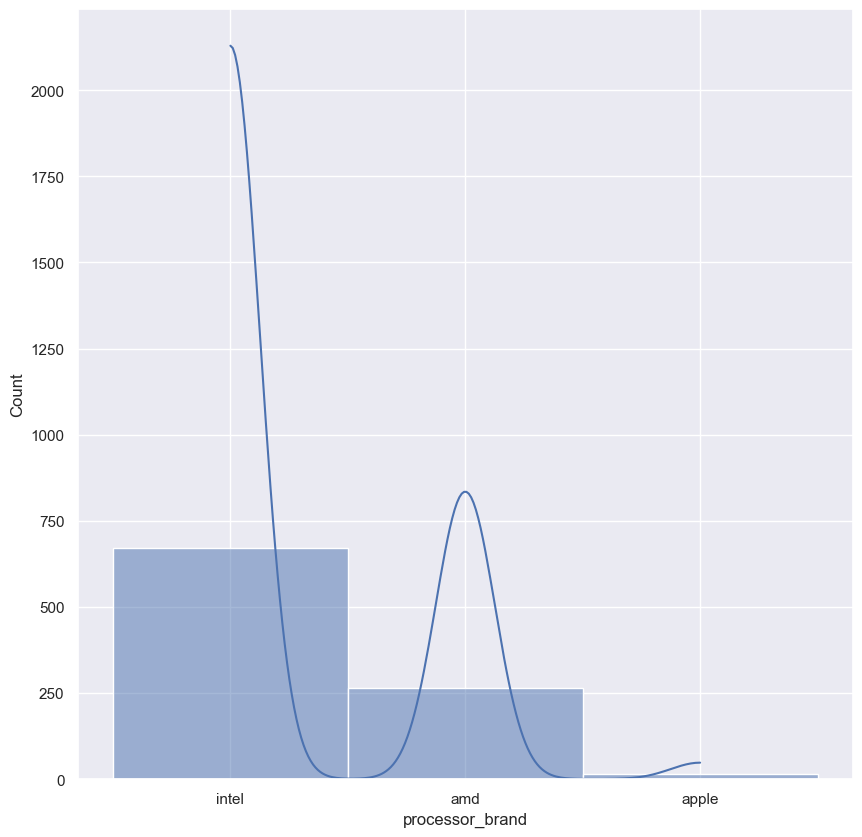

In [31]:
plt.figure(figsize=(10,10))
threeVars = threeVars[~threeVars['processor_brand'].str.contains('other')]
sb.histplot(data = threeVars['processor_brand'], kde = True)

<Axes: xlabel='ram_memory', ylabel='Count'>

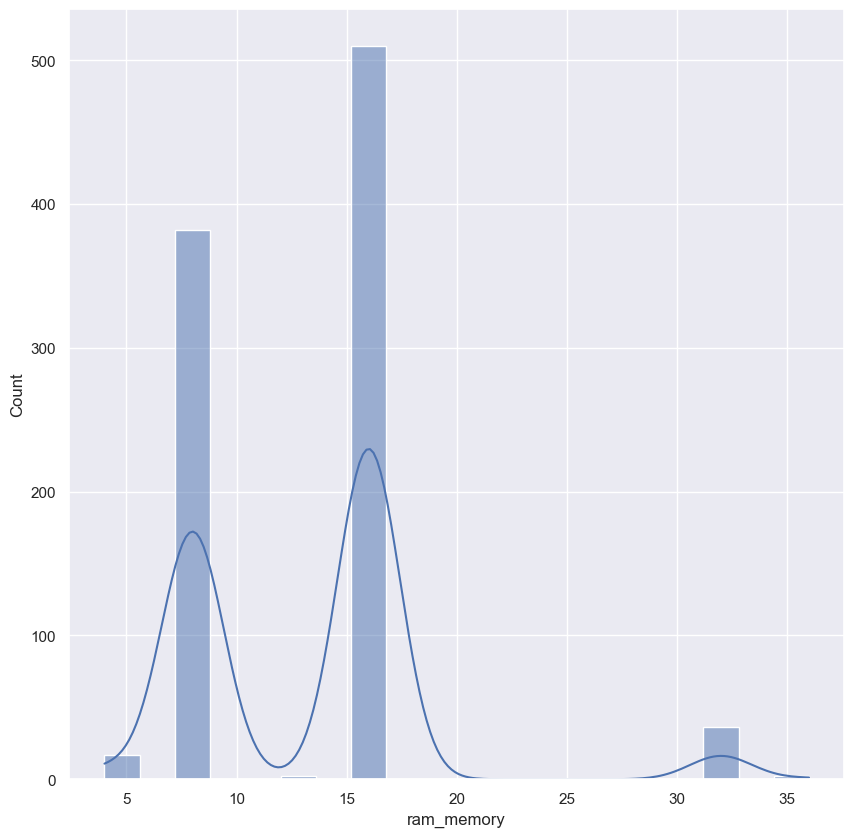

In [32]:
plt.figure(figsize=(10,10))
threeVars = threeVars[~threeVars['processor_brand'].str.contains('other')]
sb.histplot(data = threeVars['ram_memory'], kde = True)

<Axes: xlabel='brand', ylabel='Count'>

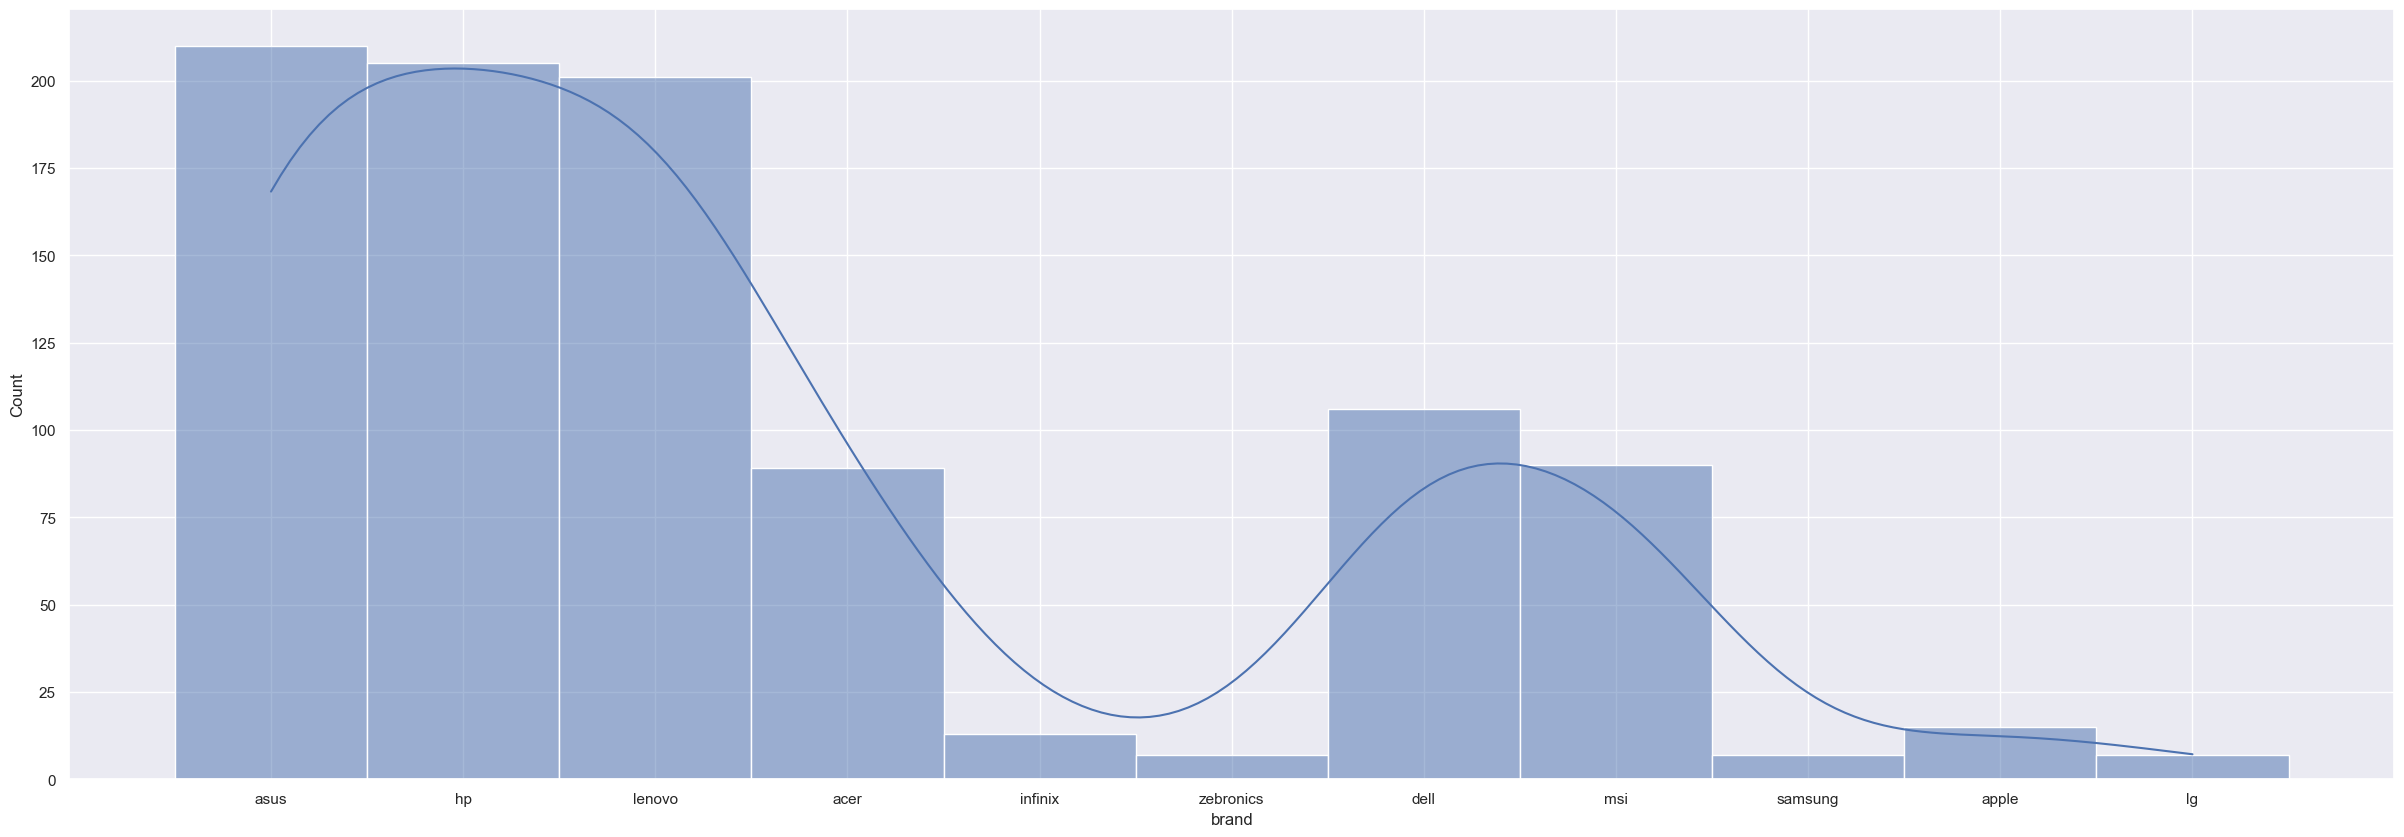

In [23]:
plt.figure(figsize=(30,10))
sb.histplot(data = threeVars['brand'], kde = True)

**We then plot boxplots for Price against each of the 3 variables, and obtain some basic descriptory statistics such as mean, median, mode and the quartile dispersions for each boxplot of all variables.**

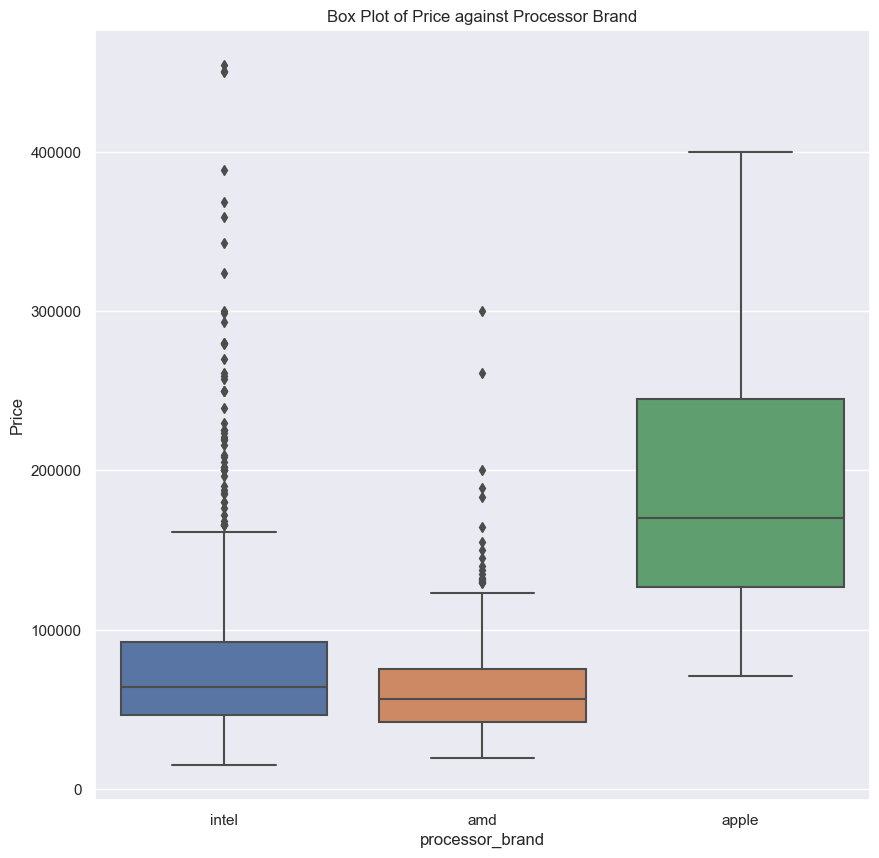

In [33]:
threeVars = threeVars[~threeVars['processor_brand'].str.contains('other')]
plt.figure(figsize=(10, 10))
sb.boxplot(data=threeVars, x='processor_brand', y='Price')
plt.title('Box Plot of Price against Processor Brand')
plt.show()


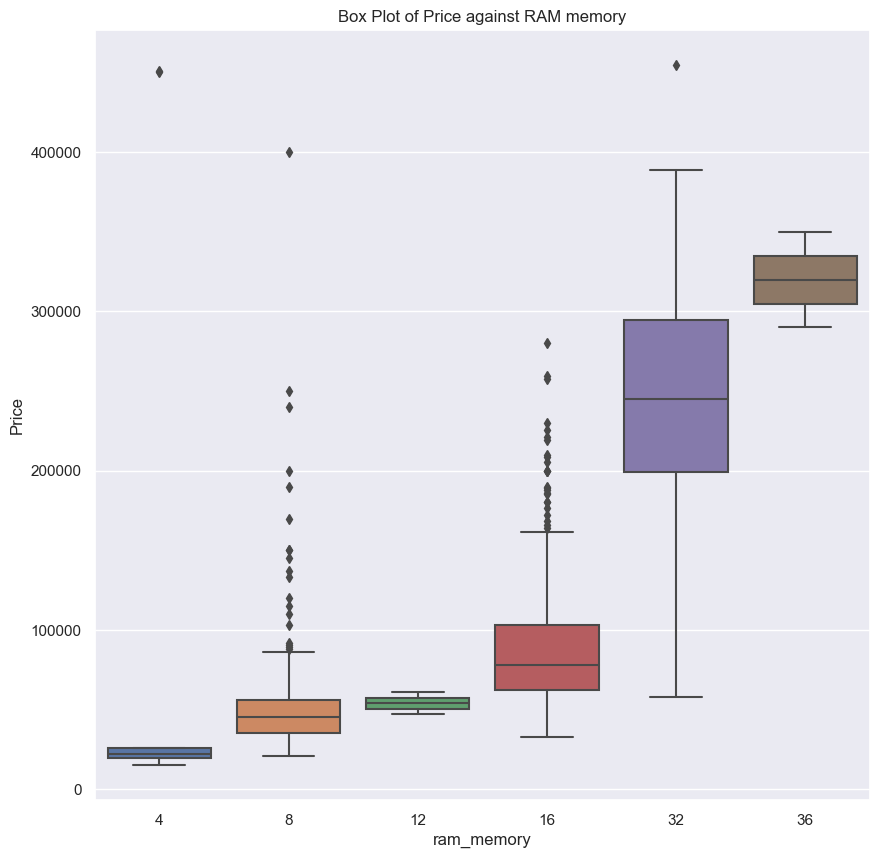

In [25]:
plt.figure(figsize=(10, 10))
sb.boxplot(data=threeVars, x='ram_memory', y='Price')
plt.title('Box Plot of Price against RAM memory')
plt.show()

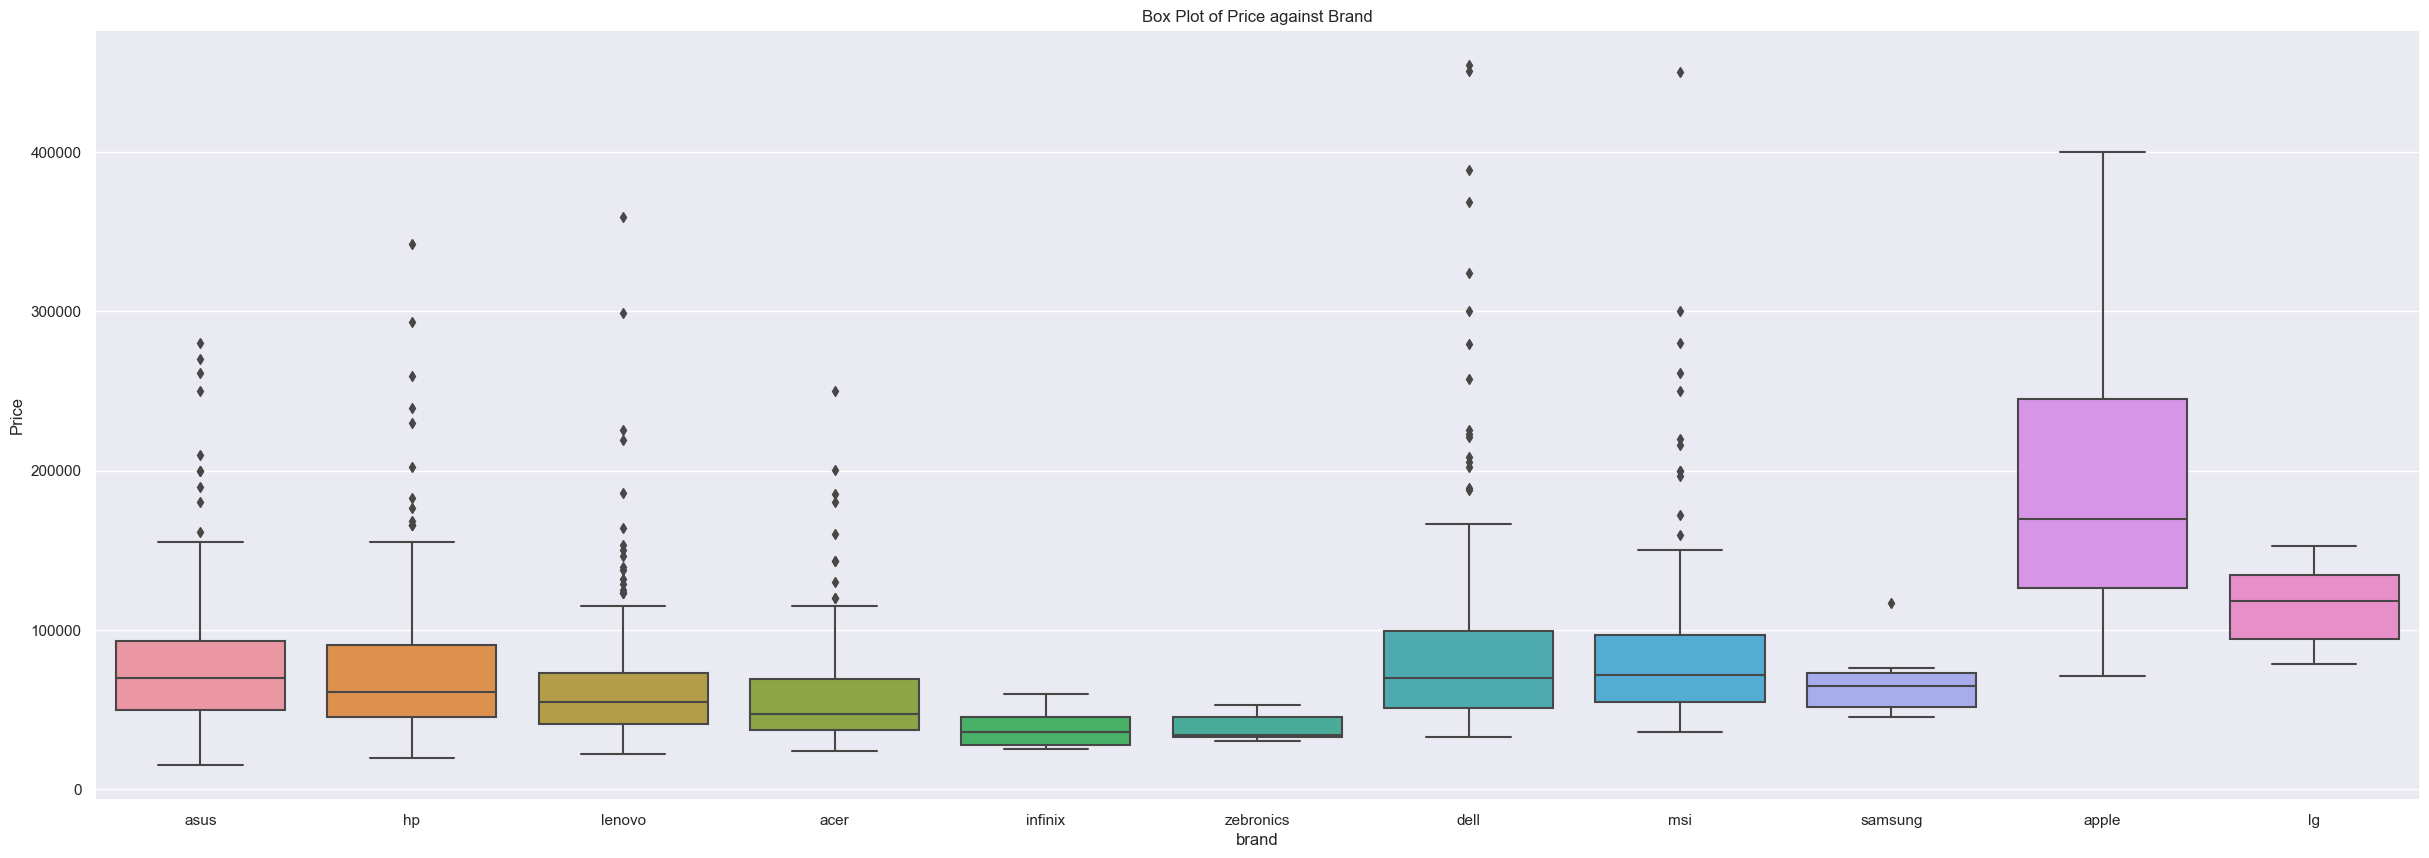

In [26]:
plt.figure(figsize=(30, 10))
sb.boxplot(data=threeVars, x='brand', y='Price')
plt.title('Box Plot of Price against Brand')
plt.show()

In [40]:
threeVars = threeVars[~threeVars['processor_brand'].str.contains('other')]
stats1 = threeVars.groupby('processor_brand')['Price'].describe()
print(stats1)

                 count           mean           std      min       25%  \
processor_brand                                                          
amd              263.0   65302.353612  36553.781000  19299.0   41899.0   
apple             15.0  193875.333333  95275.550594  70990.0  126490.0   
intel            671.0   81803.292101  60258.696828  14990.0   46389.0   

                      50%       75%       max  
processor_brand                                
amd               56700.0   74990.0  299990.0  
apple            169900.0  244900.0  399900.0  
intel             63999.0   92495.0  454490.0  


In [41]:
stats2 = threeVars.groupby('ram_memory')['Price'].describe()
print(stats2)

            count           mean            std       min        25%  \
ram_memory                                                             
4            17.0   71906.411765  142531.454709   14990.0   19299.00   
8           382.0   50592.180628   31944.066604   20990.0   35013.25   
12            2.0   53990.000000    9899.494937   46990.0   50490.00   
16          510.0   88240.596078   38813.538780   32990.0   62525.00   
32           36.0  240932.000000   87187.350846   57990.0  199137.50   
36            2.0  319900.000000   42426.406871  289900.0  304900.00   

                 50%        75%       max  
ram_memory                                 
4            21990.0   25751.00  450990.0  
8            44990.0   55697.25  399900.0  
12           53990.0   57490.00   60990.0  
16           77690.0  102996.25  279990.0  
32          244644.5  294496.75  454490.0  
36          319900.0  334900.00  349900.0  


In [29]:
stats3 = df.groupby('brand')['Price'].describe()
print(stats3)

           count           mean           std      min       25%       50%  \
brand                                                                        
acer        89.0   62847.876404  42489.771217  23990.0   36990.0   46990.0   
apple       15.0  193875.333333  95275.550594  70990.0  126490.0  169900.0   
asus       210.0   78290.223810  44517.289905  14990.0   49615.0   69839.5   
avita        5.0   25461.800000   6694.926191  19421.0   20999.0   21390.0   
axl          2.0   16490.000000   2121.320344  14990.0   15740.0   16490.0   
chuwi        4.0   28740.000000   6238.322424  21990.0   24240.0   28990.0   
dell       106.0  101701.132075  87628.449818  32990.0   50990.0   69494.5   
fujitsu      5.0   82890.800000  21690.947494  56494.0   73990.0   73990.0   
gigabyte     2.0   80990.000000  12727.922061  71990.0   76490.0   80990.0   
honor        2.0   49490.000000   7778.174593  43990.0   46740.0   49490.0   
hp         205.0   76005.604878  48908.691462  19299.0   44990.0

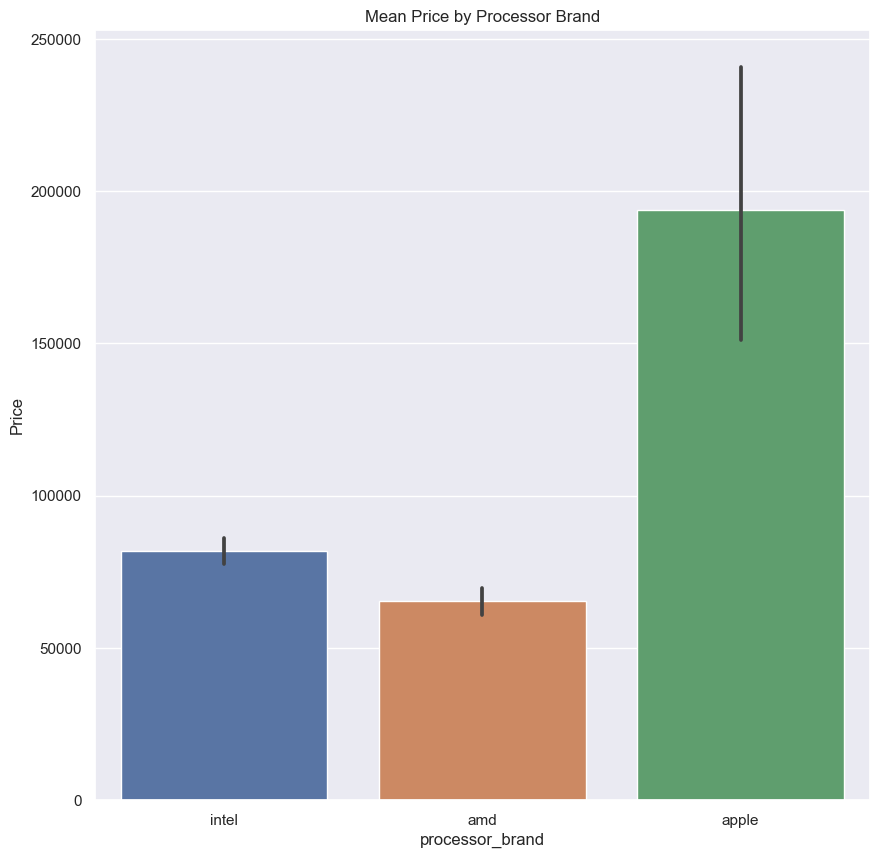

In [42]:
threeVars = threeVars[~threeVars['processor_brand'].str.contains('other')]
plt.figure(figsize=(10, 10))
sb.barplot(data=threeVars, x='processor_brand', y='Price')
plt.title(f'Mean Price by Processor Brand')
plt.show()

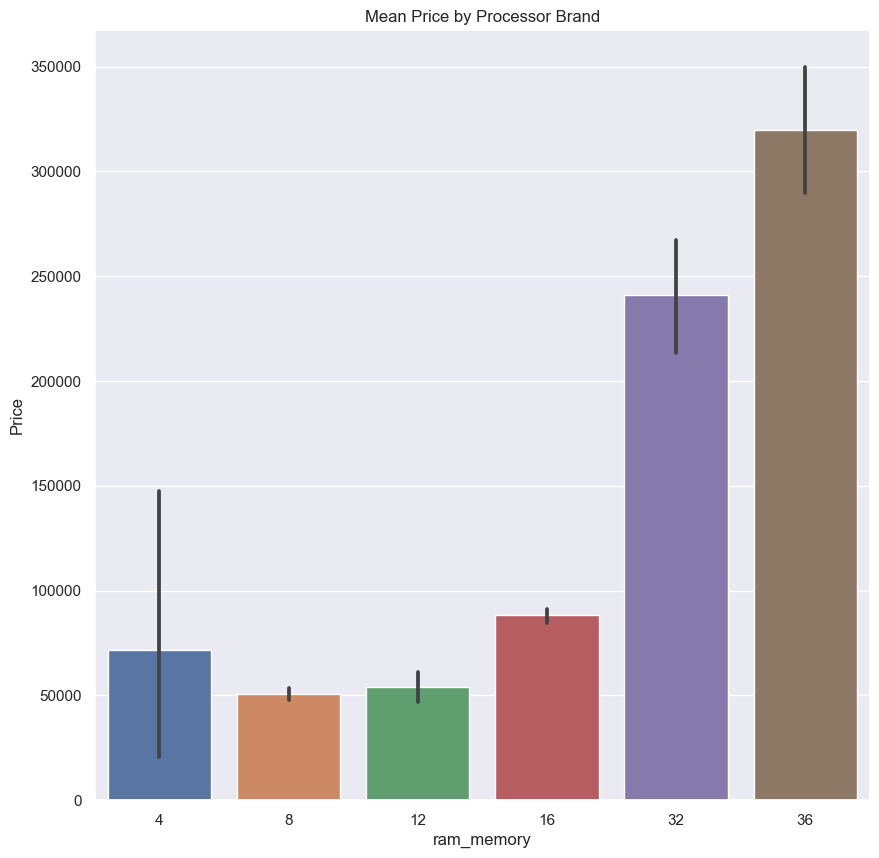

In [129]:
plt.figure(figsize=(10, 10))
sb.barplot(data=threeVars, x='ram_memory', y='Price')
plt.title(f'Mean Price by Processor Brand')
plt.show()

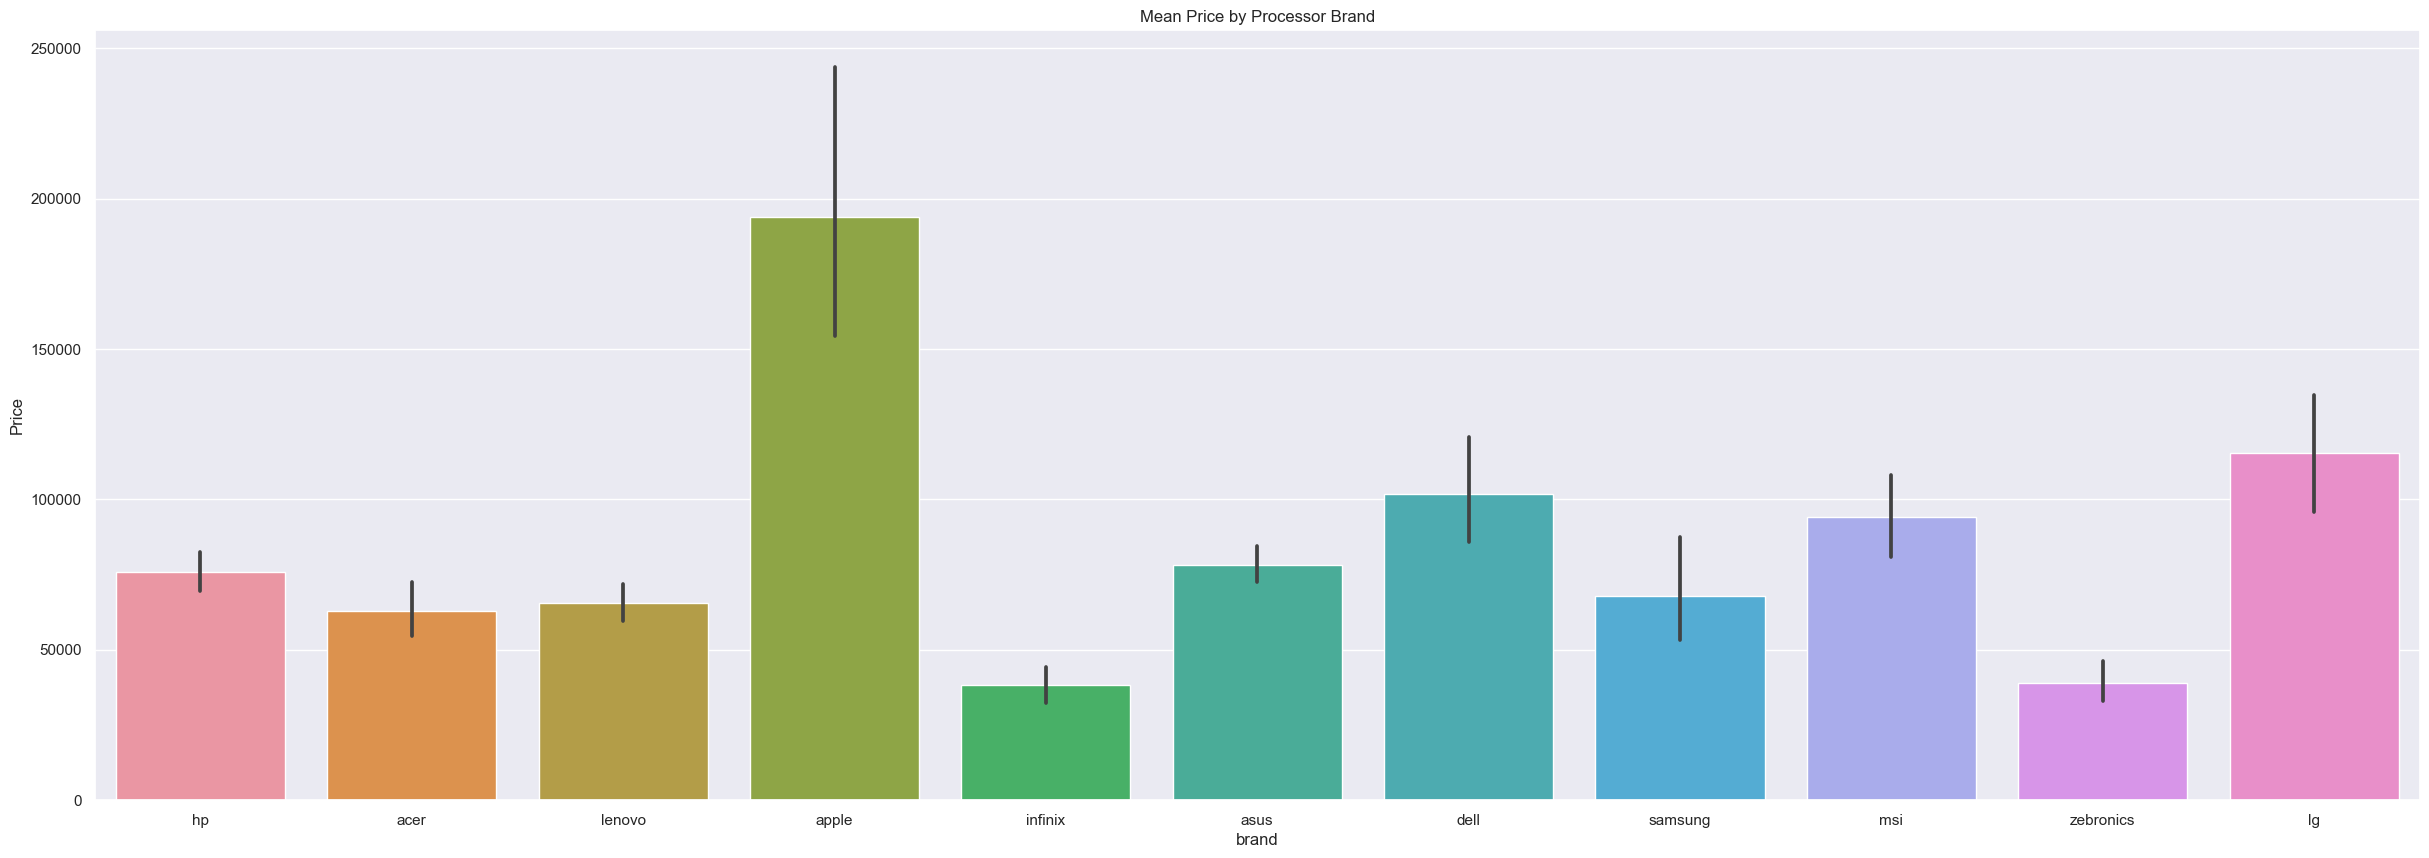

In [130]:
plt.figure(figsize=(30, 10))
sb.barplot(data=threeVars, x='brand', y='Price')
plt.title(f'Mean Price by Processor Brand')
plt.show()

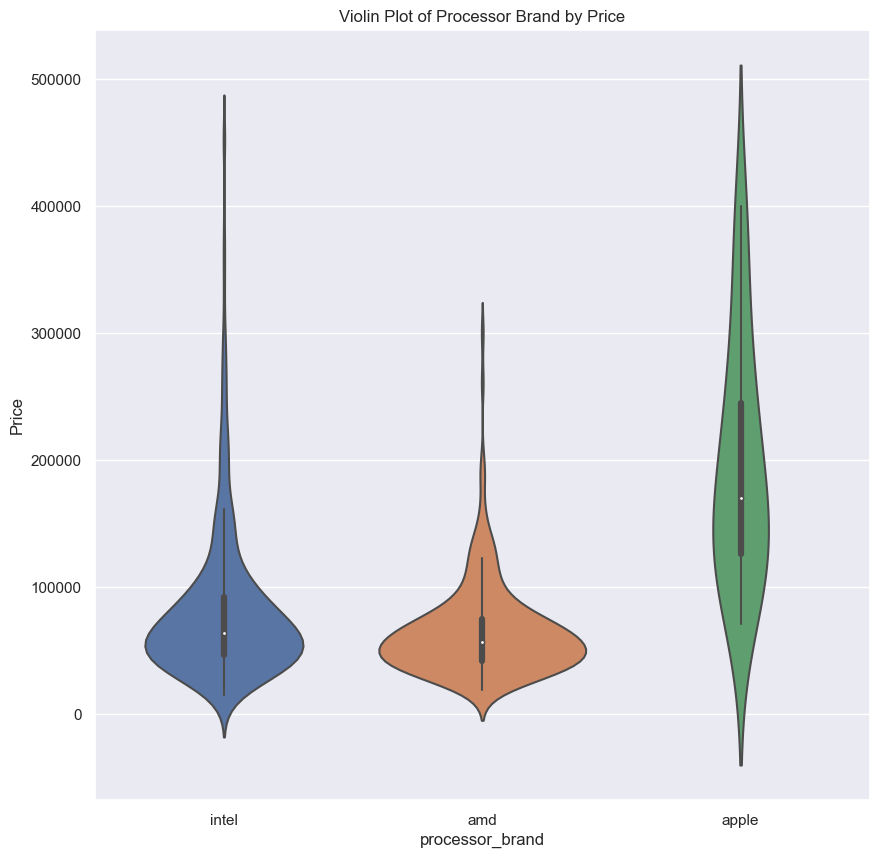

In [43]:
plt.figure(figsize=(10, 10))
threeVars = threeVars[~threeVars['processor_brand'].str.contains('other')]
sb.violinplot(data=threeVars, x='processor_brand', y='Price')
plt.title(f'Violin Plot of Processor Brand by Price')
plt.show()

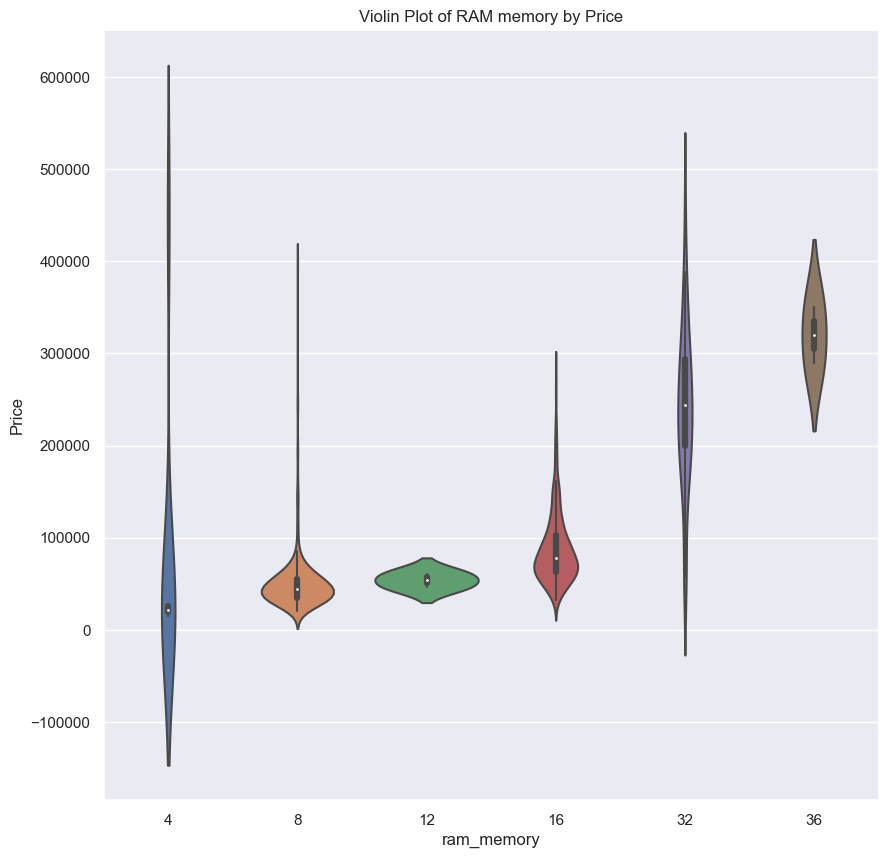

In [132]:
plt.figure(figsize=(10, 10))
sb.violinplot(data=threeVars, x='ram_memory', y='Price')
plt.title(f'Violin Plot of RAM memory by Price')
plt.show()

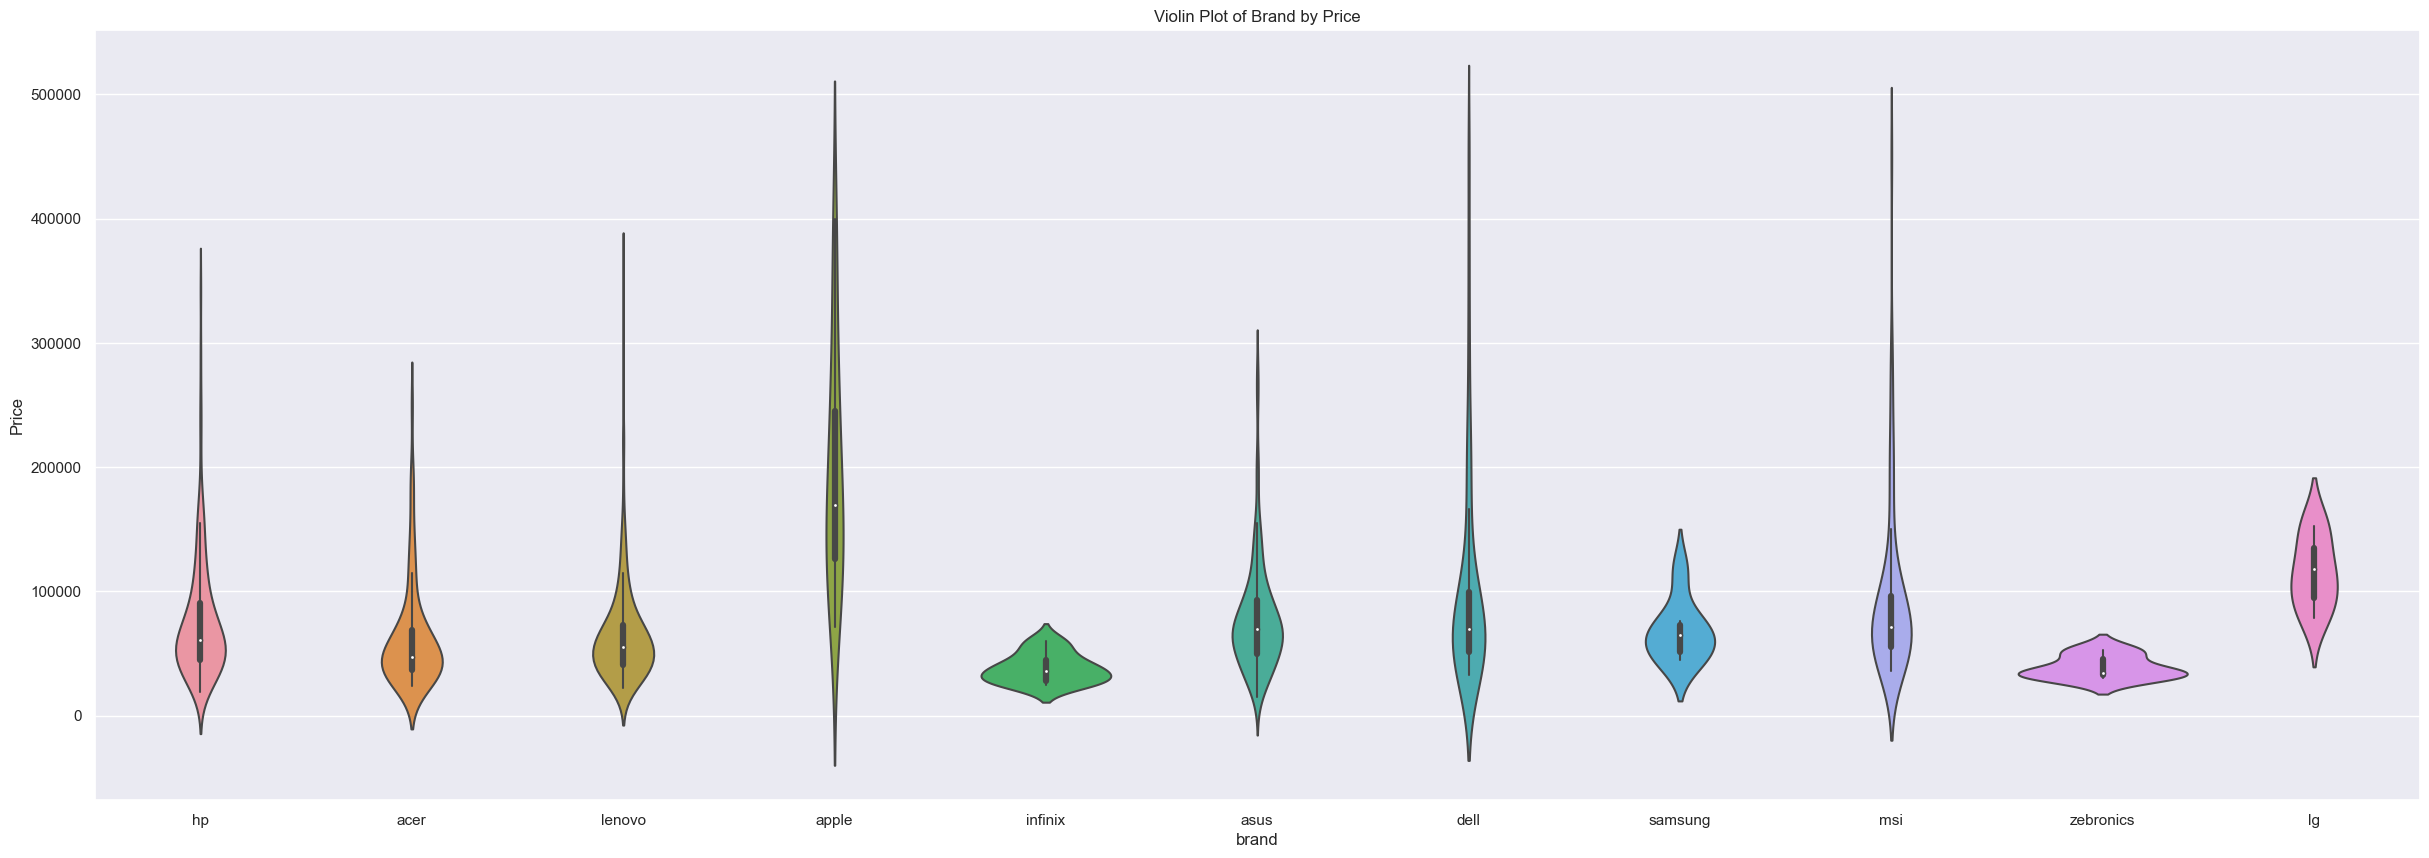

In [133]:
plt.figure(figsize=(30, 10))
sb.violinplot(data=threeVars, x='brand', y='Price')
plt.title(f'Violin Plot of Brand by Price')
plt.show()

**We decided to harness Strip Plots as well for our visual descriptions instead of Swarm Plots so we could encompass the whole dataframe and see an expressive spread of the data for each variable by setting jitter to True.**

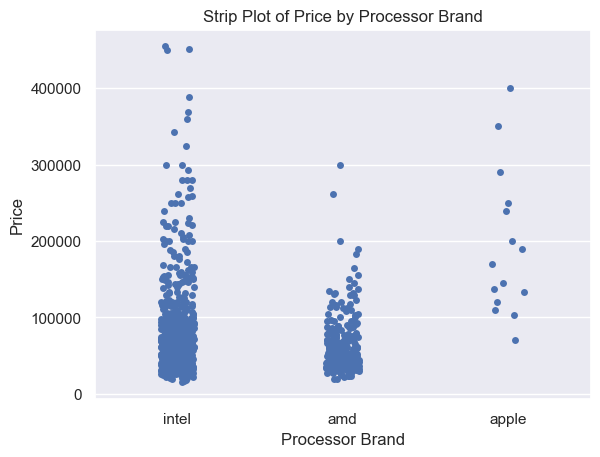

In [44]:
threeVars = threeVars[~threeVars['processor_brand'].str.contains('other')]
sb.stripplot(data=threeVars, x='processor_brand', y='Price', jitter=True)
plt.title('Strip Plot of Price by Processor Brand')
plt.xlabel('Processor Brand')
plt.ylabel('Price')
plt.show()


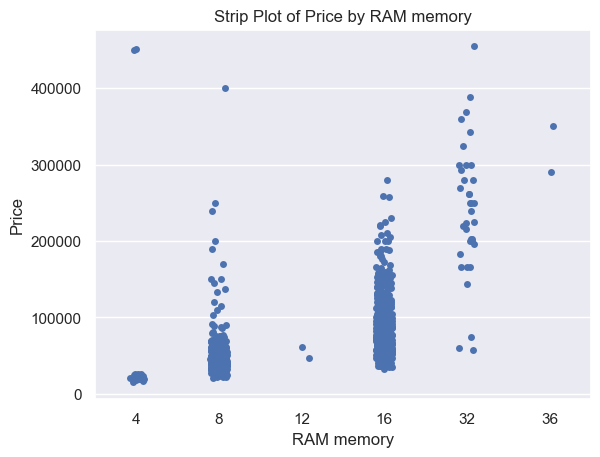

In [135]:
sb.stripplot(data=threeVars, x='ram_memory', y='Price', jitter=True)
plt.title('Strip Plot of Price by RAM memory')
plt.xlabel('RAM memory')
plt.ylabel('Price')
plt.show()

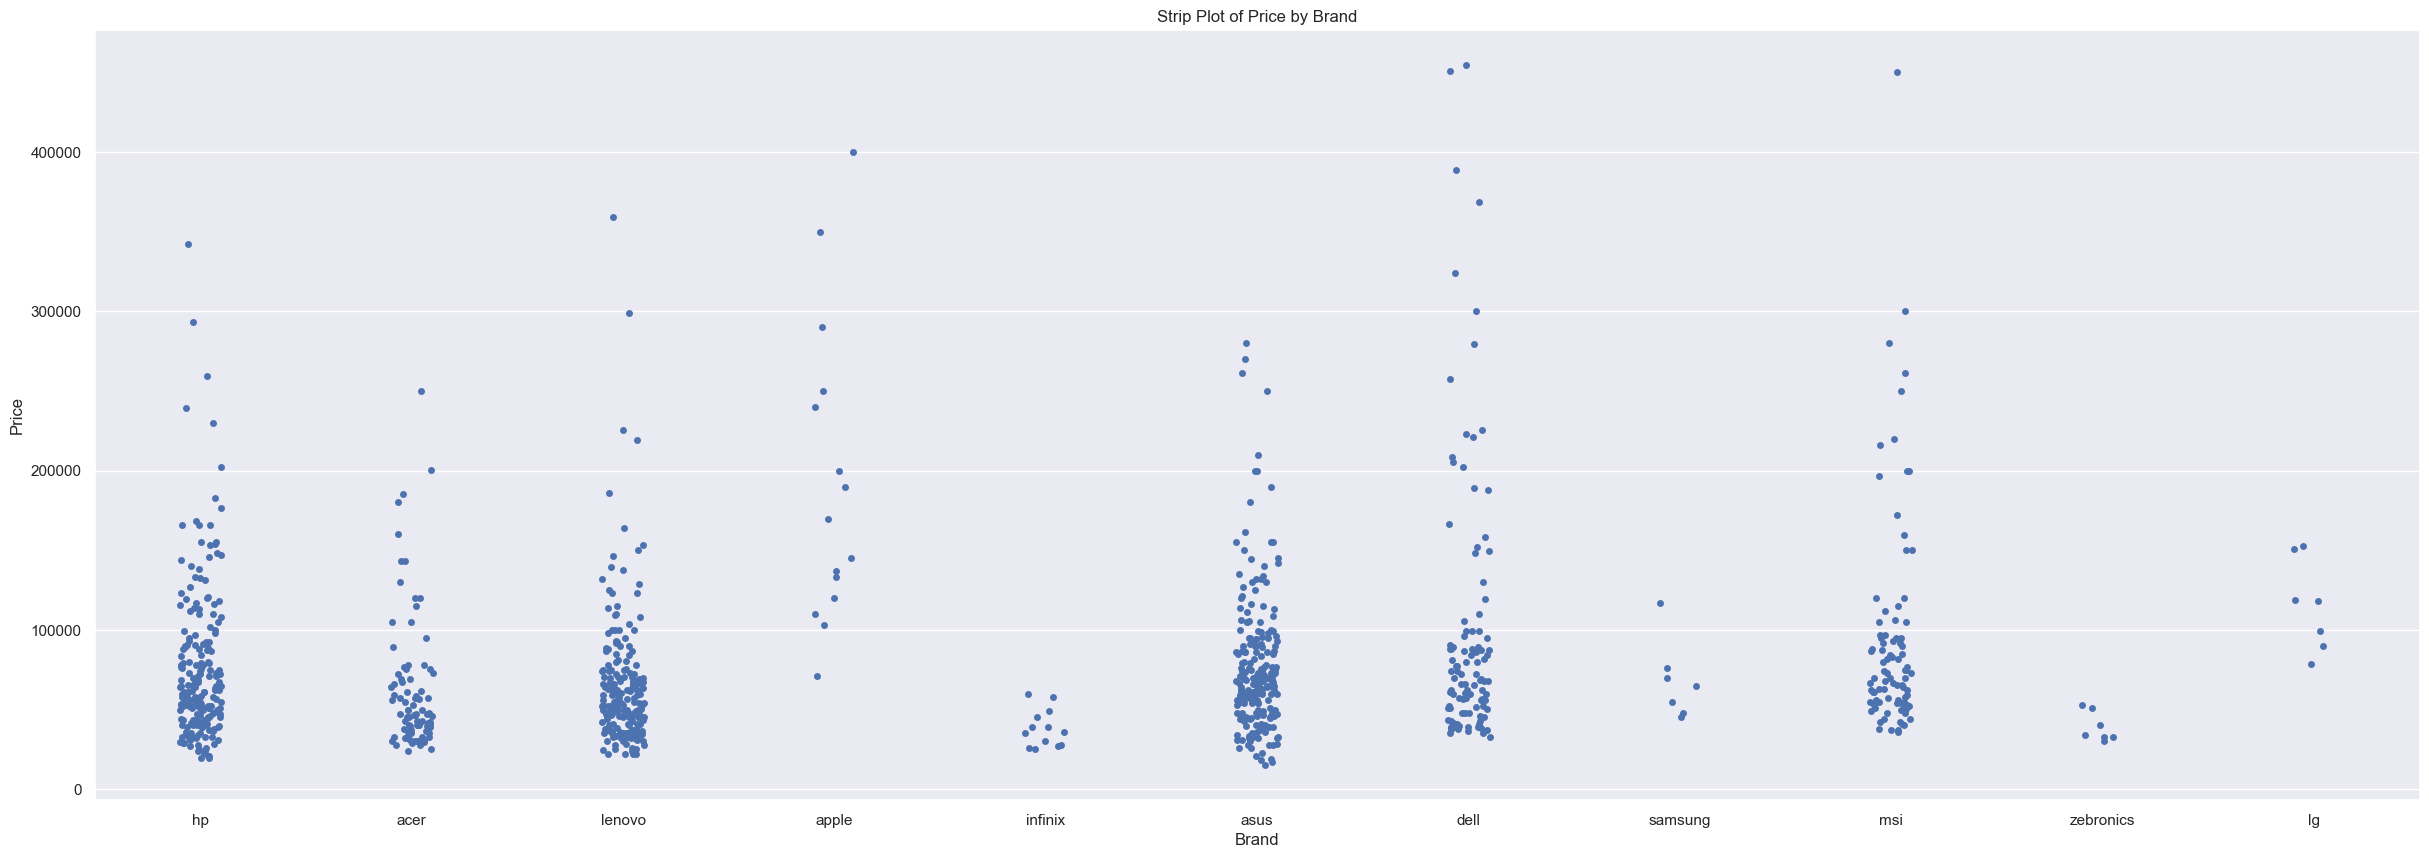

In [136]:
plt.figure(figsize = (30,10))
sb.stripplot(data=threeVars, x='brand', y='Price', jitter=True)
plt.title('Strip Plot of Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()